In [31]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [146]:

# import nltk
import sklearn
print(sklearn.__version__)
# print(nltk.__version__)

1.4.2


In [32]:
df=pd.read_csv(r'dataset\email.csv')

In [33]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df.shape

(5573, 2)

In [35]:
df.nunique()

Category       3
Message     5158
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [37]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [38]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [39]:
df[df['Category'] =='{"mode":"full"']

,Category,Message
5572,"{""mode"":""full""",isActive:false}


In [40]:
df.drop(df[df['Category'] =='{"mode":"full"'].index, inplace=True)

In [41]:
df['Category'].nunique()

2

In [42]:
#Encoding of the column Category 
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# encoder=OneHotEncoder(sparse_output=False)
encoder=LabelEncoder()
df['Category']=encoder.fit_transform(df[['Category']])

c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df.duplicated().sum()

415

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
df.shape

(5157, 2)

In [48]:
df.duplicated().sum()

0

In [49]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [50]:
df["Message"].isnull().sum()

0

In [51]:
df['Message'].duplicated().sum()

0

# EDA

In [52]:
counts=df['Category'].value_counts()

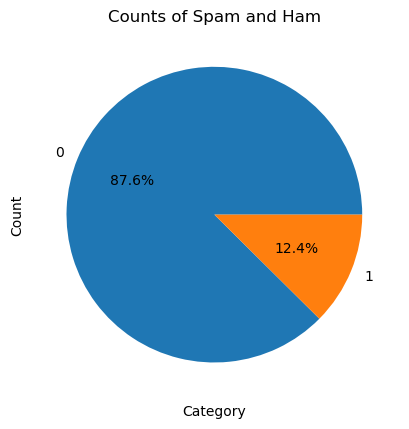

In [53]:

# Plotting the counts
# counts.plot(kind='bar')
counts.plot(kind='pie', autopct='%1.1f%%' )
plt.title('Counts of Spam and Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [54]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
df['Message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [57]:
df['char_numbers']=df['Message'].apply(len)


In [58]:
df['char_numbers']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: char_numbers, Length: 5157, dtype: int64

In [59]:
df.head()

,Category,Message,char_numbers
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
df['Message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [61]:
df['Words_numbers']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [62]:
df.head()

,Category,Message,char_numbers,Words_numbers
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [63]:
df[['Message']]

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [64]:
df['Num_sentence']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [65]:
df.head()

,Category,Message,char_numbers,Words_numbers,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [66]:
df.describe()

,Category,char_numbers,Words_numbers,Num_sentence
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [67]:
df[df['char_numbers']==910]

,Category,Message,char_numbers,Words_numbers,Num_sentence
1085,0,For me the love should start with attraction.i...,910,175,1


In [68]:
df[df['Category'] == 0].describe()


,Category,char_numbers,Words_numbers,Num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869353,17.267715,1.827724
std,0.0,56.708301,13.588065,1.394338
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [69]:
df[df['Category'] == 1].describe()


,Category,char_numbers,Words_numbers,Num_sentence
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.970359
std,0.0,30.399707,7.103501,1.485575
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


<Axes: xlabel='char_numbers', ylabel='Count'>

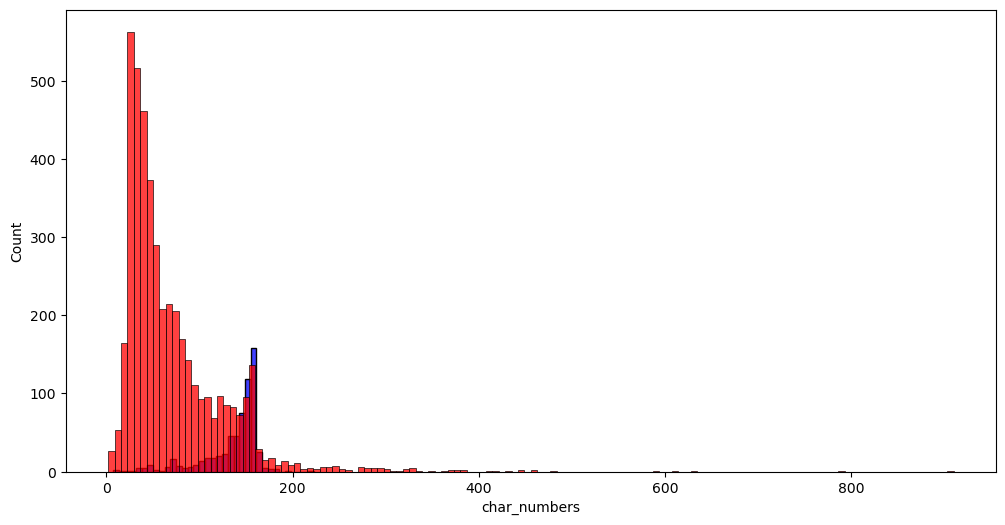

In [70]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['Category'] == 1]['char_numbers'],color='blue')   #spam has higher char nubmers 
sns.histplot(df[df['Category'] == 0]['char_numbers'],color='red')   #ham has lower char nubmers

In [71]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

<Axes: xlabel='Words_numbers', ylabel='Count'>

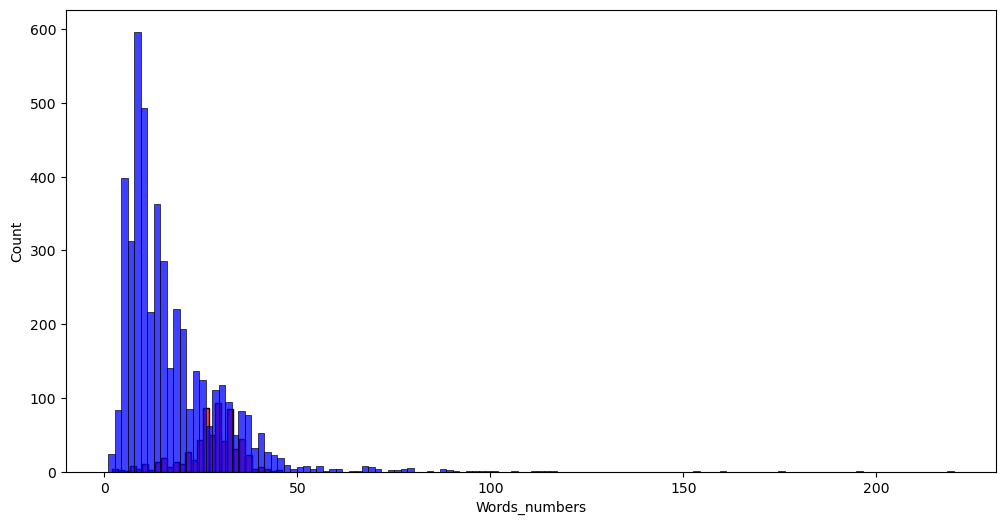

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 1]['Words_numbers'],color='red')
sns.histplot(df[df['Category'] == 0]['Words_numbers'],color='blue')

<Axes: xlabel='char_numbers', ylabel='Count'>

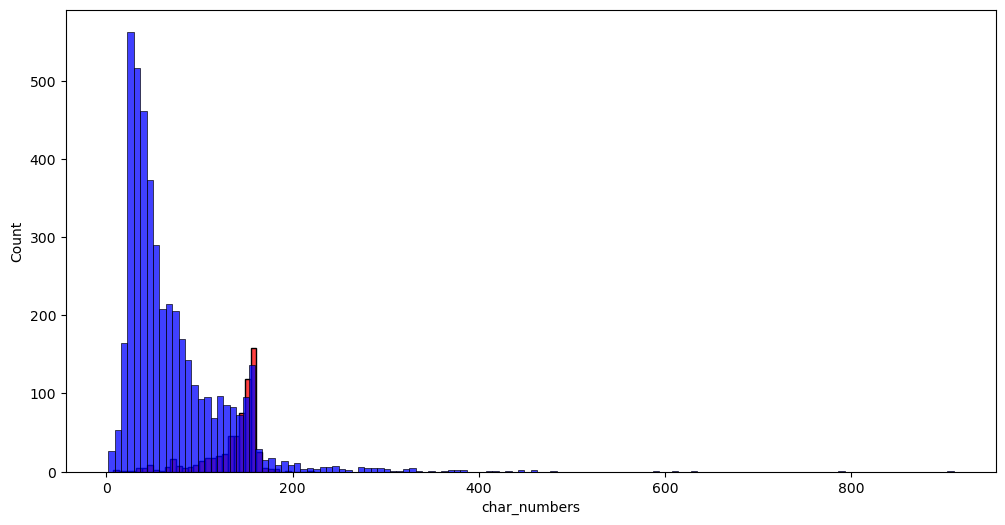

In [73]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 1]['char_numbers'],color='red')
sns.histplot(df[df['Category'] == 0]['char_numbers'],color='blue')

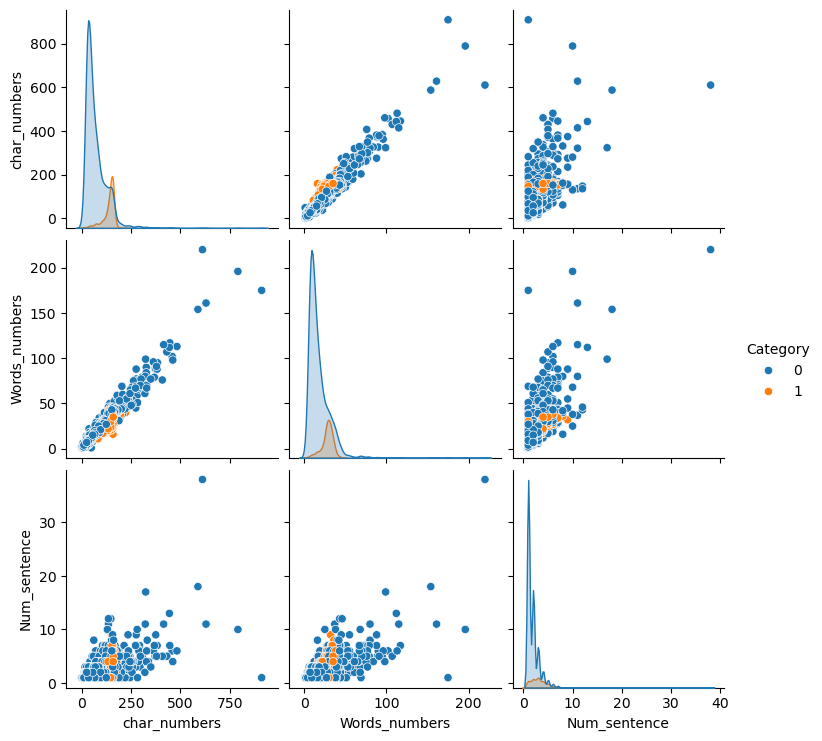

In [74]:
sns.pairplot(df,hue='Category',height=2.5)

In [75]:
numeric_feature=df.select_dtypes(include=['number'])
numeric_feature

,Category,char_numbers,Words_numbers,Num_sentence
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

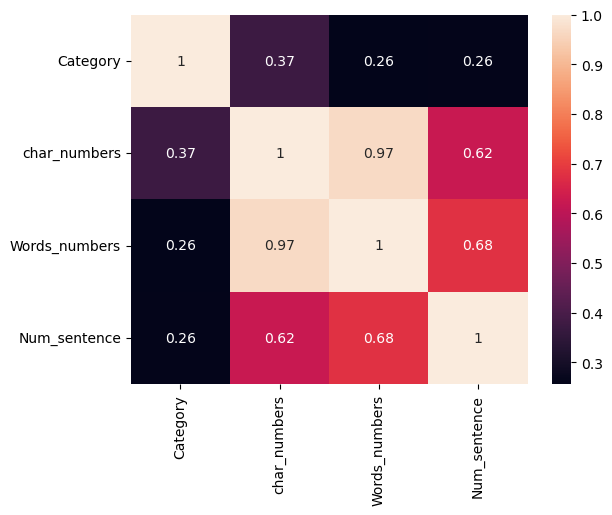

In [76]:
sns.heatmap(numeric_feature.corr(),annot=True)

# Data preprocessing

1.lower case

2.tokenization

3.removing special character

4.removing stop words and punctuation

5.stemming

In [77]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
import string

In [79]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [80]:
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
            y.append(ps.stem(i))
    
    
    return " ".join(y)
    # return y

In [81]:
transform_text('''FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv''')

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [82]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [83]:
df['Message'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [84]:
df['tranformed_message']=df['Message'].apply(transform_text)
# df.drop(columns=['tranformed_text'],inplace=True)

In [85]:
df.head()

,Category,Message,char_numbers,Words_numbers,Num_sentence,tranformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# world cloud 

In [86]:
! pip install wordcloud

In [87]:
from wordcloud import WordCloud
wx=WordCloud(width=600,height=400,background_color='white',min_font_size=10)

In [88]:
spam_message=wx.generate(df[df['Category']==1]['tranformed_message'].str.cat(sep=" "))

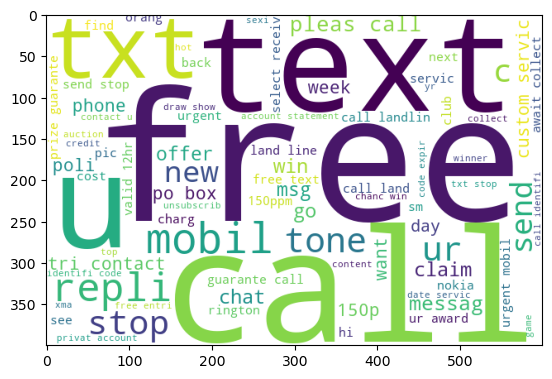

In [89]:
plt.imshow(spam_message)

In [90]:
ham_message=wx.generate(df[df['Category']==0]['tranformed_message'].str.cat(sep=" "))

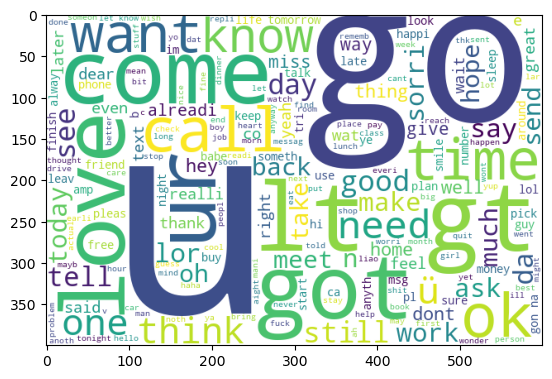

In [91]:
plt.imshow(ham_message)

In [92]:
df.head()

,Category,Message,char_numbers,Words_numbers,Num_sentence,tranformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
spam_corpus=[]
for msg in df[df["Category"]==1]['tranformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [94]:
len(spam_corpus)

9781

In [95]:
ham_corpus=[]
for msg in df[df["Category"]==0]['tranformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [96]:
len(ham_corpus)

35940

len(ham_corpus)

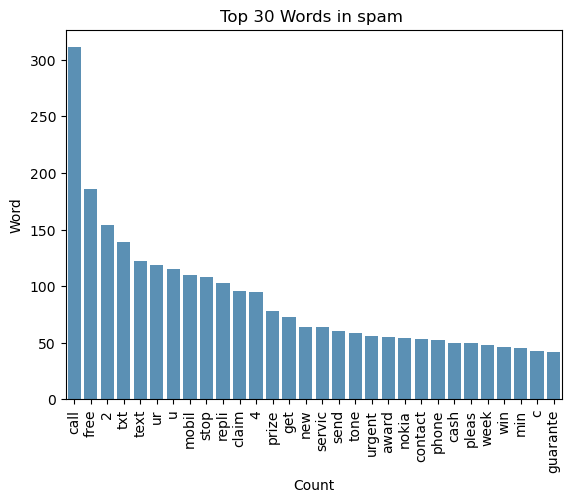

In [97]:
from collections import Counter
top_words = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(top_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df1, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in spam ')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [98]:
df1.head()

,word,count
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122


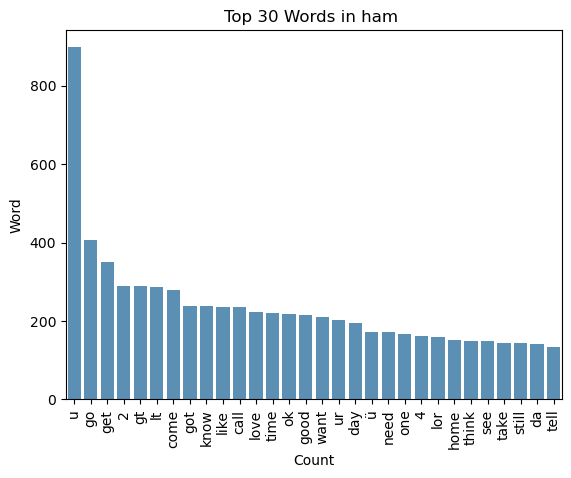

In [99]:
from collections import Counter
top_words2 = Counter(ham_corpus).most_common(30)
df2= pd.DataFrame(top_words2, columns=['words', 'counts'])

sns.barplot(x='words', y='counts', data=df2, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in ham ')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [100]:
df2.head()

,words,counts
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288


## Model Training


In [101]:
#  Why to convert to vectores not directly using encoding on text?
# because the text is not in the same length and we need to convert it to a fixed length
# One hot encoding does not consider the semantics relationship between the words
# Encoding directly consider each word as a different feature and does not consider the relationship between the words

In [102]:
# Bag of words using
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()


In [103]:
# X=cv.fit_transform(df['tranformed_message']).toarray()
X=tf.fit_transform(df['tranformed_message']).toarray()

In [104]:
X.shape    #5157 is the number of text samples (rows) in your dataset — here, the number of messages or documents you have.

# 6781 is the number of unique words (features) found across all those messages after tokenization — the size of your vocabulary.

(5157, 6781)

In [105]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
y=df['Category'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [111]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [112]:
X_train.shape

(4125, 6781)

In [113]:
y_train.shape

(4125,)

In [114]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print("GaussianNB accuracy score: ",accuracy_score(y_test,y_pred))
print("GaussianNB confusion matrix: ",confusion_matrix(y_test,y_pred))
print("GaussianNB classification report: ",classification_report(y_test,y_pred))
print("GaussianNB precision score: ",precision_score(y_test,y_pred))

GaussianNB accuracy score:  0.8837209302325582
GaussianNB confusion matrix:  [[792 104]
 [ 16 120]]
GaussianNB classification report:                precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.54      0.88      0.67       136

    accuracy                           0.88      1032
   macro avg       0.76      0.88      0.80      1032
weighted avg       0.92      0.88      0.89      1032

GaussianNB precision score:  0.5357142857142857


In [115]:
mb.fit(X_train,y_train)
y_pred2=mb.predict(X_test)
print("MultinomialNB accuracy score: ",accuracy_score(y_test,y_pred2))
print("MultinomialNB confusion matrix: ",confusion_matrix(y_test,y_pred2))
# print("MultinomialNB classification report: ",classification_report(y_test,y_pred2))
print("MultinomialNB precision score: ",precision_score(y_test,y_pred2))

MultinomialNB accuracy score:  0.9631782945736435
MultinomialNB confusion matrix:  [[896   0]
 [ 38  98]]
MultinomialNB precision score:  1.0


In [116]:
bb.fit(X_train,y_train)
y_predb=bb.predict(X_test)
print("BernoulliNB accuracy score: ",accuracy_score(y_test,y_predb))
print("BernoulliNB confusion matrix: ",confusion_matrix(y_test,y_predb))
# print("BernoulliNB classification report: ",classification_report(y_test,y_predb))
print("BernoulliNB precision score: ",precision_score(y_test,y_predb))

BernoulliNB accuracy score:  0.9680232558139535
BernoulliNB confusion matrix:  [[890   6]
 [ 27 109]]
BernoulliNB precision score:  0.9478260869565217


# different classfication models

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [118]:
models = {
    'lr': LogisticRegression(),
    'sv': SVC(),
    'mb': MultinomialNB(),
    'rf': RandomForestClassifier(),
    'dt': DecisionTreeClassifier(),
    'gb': GradientBoostingClassifier(),
    'ad': AdaBoostClassifier(),
    'xg': XGBClassifier()
}

In [119]:
model_main_params = {
    'lr': {
        'penalty': ['l2'],
        'C': [1.0],
        'solver': ['lbfgs'],
        'max_iter': [100]
    },
    'sv': {
        'C': [1.0],
        'kernel': ['rbf'],
        'gamma': ['scale'],
        'probability': [False]
    },
    'mb': {
        'alpha': [1.0],
        'fit_prior': [True]
    },
    'rf': {
        'n_estimators': [100],
        'criterion': ['gini'],
        'max_depth': [None],
        'min_samples_split': [2]
    },
    'dt': {
        'criterion': ['gini'],
        'max_depth': [None],
        'min_samples_split': [2]
    },
    'gb': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3],
        'subsample': [1.0]
    },
    'vc': {
        'estimators': [[]],
        'voting': ['hard'],
        'weights': [None]
    },
    'ad': {
        'n_estimators': [50],
        'learning_rate': [1.0],
        'algorithm': ['SAMME.R']
    },
    'xg': {
        'n_estimators': [100],
        'max_depth': [6],
        'learning_rate': [0.3],
        'subsample': [1],
        'colsample_bytree': [1]
    }
}

In [120]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

def evaluate_models_basic(X_train, y_train, X_test, y_test, models):
    results = {}
    
    for name, model in models.items():
        print(f"Training and evaluating {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'accuracy': acc,
            'precision': prec,
            'confusion_matrix': cm,
        }
        
        print(f"{name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}")
        print(f"Confusion Matrix:\n{cm}\n")
        
    return results


In [121]:
! pip install scikit-learn

In [ ]:
# best_result_without_tuning = evaluate_models_basic(X_train, y_train, X_test, y_test, models)

In [ ]:
# k=pd.DataFrame(best_result_without_tuning)

In [ ]:
# k.T.sort_values(by='precision',ascending=False)

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score


def evaluate_models_with_params(X_train, y_train, X_test, y_test, models, model_main_params):
    all_results = {}
    
    for name, model in models.items():
        print(f"Tuning and evaluating {name}...")
        
        params = model_main_params.get(name, {})
        gs = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=0)
        gs.fit(X_train, y_train)
        
        best_estimator = gs.best_estimator_
        y_pred = best_estimator.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        
        all_results[name] = {
            'best_params': gs.best_params_,
            'accuracy': accuracy,
            'precision': precision
        }
        
        print(f"{name} - Best Params: {gs.best_params_}")
        print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}\n")
    
    results_df = pd.DataFrame({
        'Model': all_results.keys(),
        'Best Params': [result['best_params'] for result in all_results.values()],
        'Accuracy': [result['accuracy'] for result in all_results.values()],
        'Precision': [result['precision'] for result in all_results.values()]
    })
    
    return results_df

In [126]:
results_with_tune=evaluate_models_with_params(X_train, y_train, X_test, y_test, models, model_main_params)


Tuning and evaluating lr...
lr - Best Params: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
lr - Accuracy: 0.9477, Precision: 0.9481

Tuning and evaluating sv...
sv - Best Params: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'probability': False}
sv - Accuracy: 0.9690, Precision: 0.9691

Tuning and evaluating mb...
mb - Best Params: {'alpha': 1.0, 'fit_prior': True}
mb - Accuracy: 0.9632, Precision: 0.9647

Tuning and evaluating rf...
rf - Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
rf - Accuracy: 0.9738, Precision: 0.9740

Tuning and evaluating dt...
dt - Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
dt - Accuracy: 0.9516, Precision: 0.9533

Tuning and evaluating gb...
gb - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
gb - Accuracy: 0.9632, Precision: 0.9625

Tuning and evaluating ad...


c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ad - Best Params: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}
ad - Accuracy: 0.9671, Precision: 0.9663

Tuning and evaluating xg...
xg - Best Params: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}
xg - Accuracy: 0.9729, Precision: 0.9724



In [132]:
results_with_tune.sort_values(by='Precision',ascending=False,inplace=True)

In [133]:
results_with_tune.set_index('Model')

,Best Params,Accuracy,Precision
Model,,,
rf,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.973837,0.974049
xg,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.972868,0.972374
sv,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', ...",0.968992,0.969098
ad,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.967054,0.966316
mb,"{'alpha': 1.0, 'fit_prior': True}",0.963178,0.964676
gb,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.963178,0.962508
dt,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.951550,0.953323
lr,"{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', '...",0.947674,0.948059


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_params_rf = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}  # example, replace with your best params

rf_model = RandomForestClassifier(**best_params_rf)
rf_model.fit(X_train, y_train)
# y_prediction=rf_model.predict(X_test)

RandomForestClassifier()

In [138]:
y_prediction=rf_model.predict(X_test)

In [139]:
print('Accuracy of random forest is: ',precision_score( y_test,y_prediction))

Accuracy of random forest is:  0.9819819819819819


We can say that random forest is giving the best accuracy and precision

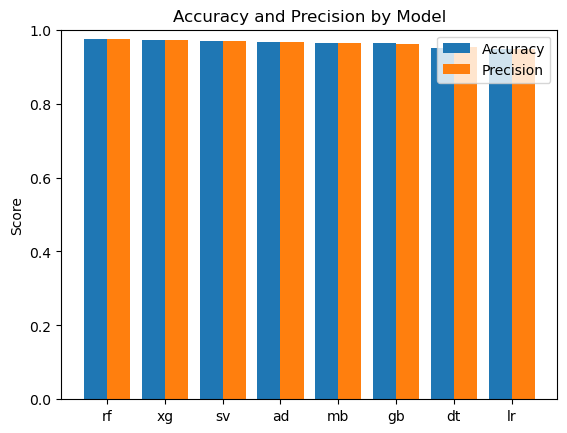

In [129]:
models = results_with_tune['Model'].tolist()
accuracy = results_with_tune['Accuracy'].tolist()
precision = results_with_tune['Precision'].tolist()

x = np.arange(len(models))
width = 0.4

plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, precision, width, label='Precision')

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Accuracy and Precision by Model')
plt.legend()
plt.show()

In [130]:
import pickle 


In [143]:
pickle.dump(tf,open('vectorconverter','wb'))
# pickle.dump(rf_model,open('model','wb'))